<a href="https://colab.research.google.com/github/Akowsor15/Project_chatbot/blob/main/Week_4_Sentiment_Analysis_shallow_ML_%26_Deep_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment relates to the meaning of a word or sequence of words and is usually associated with an opinion or emotion. And analysis? Well, this is the process of looking at data and making inferences

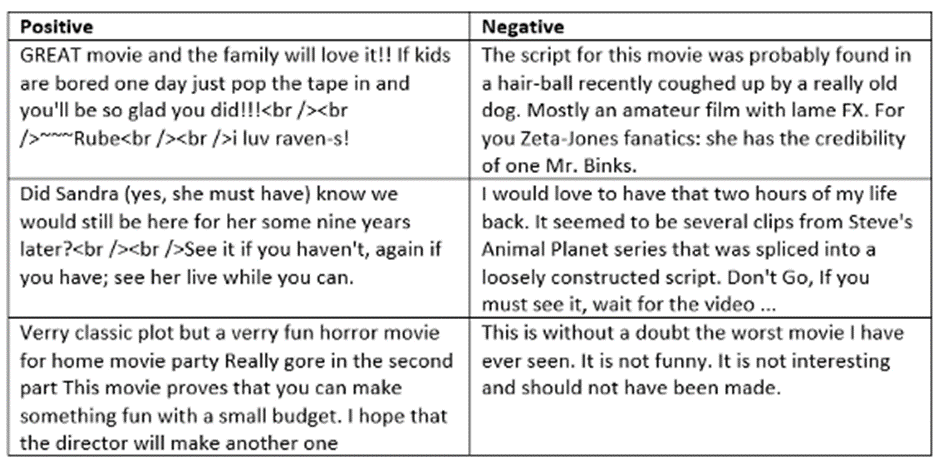

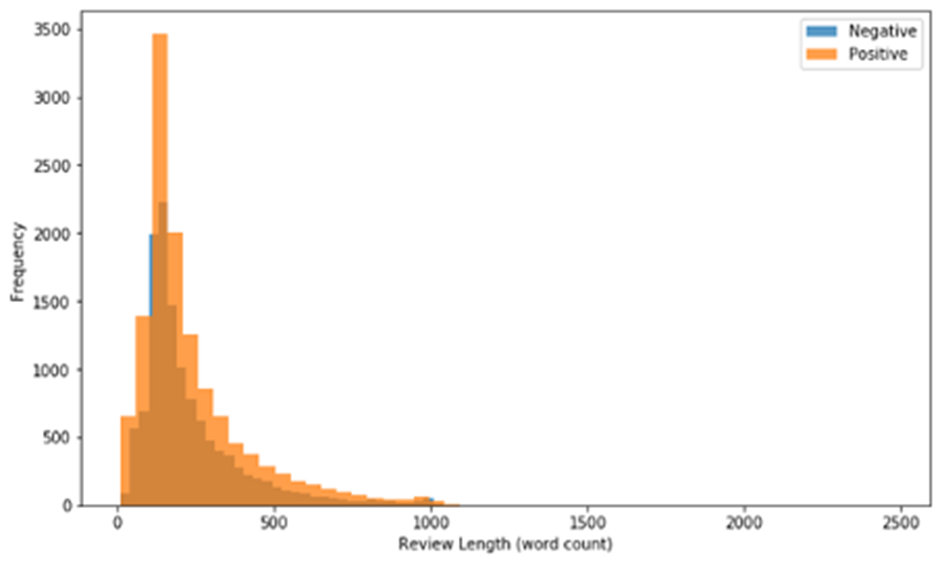

# Pre-Processing

Basic pre-processing for text consists of removing non-alphabetic characters, stop words (a set of very common words like the, a, and, etc.) and changing all words to lowercase.

In [1]:
# processes a review and returns a list of words
def review_to_words(review, string = True, remove_stopwords=True):
    # Remove HTML
    review_text = BeautifulSoup(review).get_text()
    # Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    # Convert words to lower case and split them
    words = review_text.lower().split()
    # Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    if string:
        return " ".join(words)
    else:
        return words

Frequent words with and without stop words.

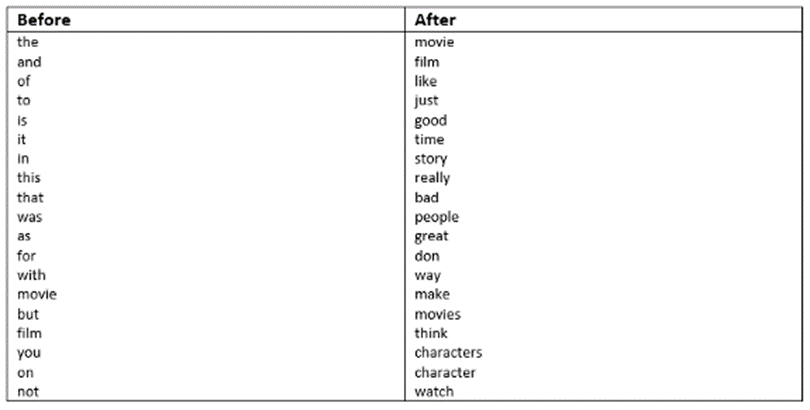

# Bag Of Words

We obtain the vocabulary list from the corpus (whole text dataset). The length of the vocabulary list is equal to the length of the vector that will be output when we apply Bag of Words (BOW). For each item (could be an entry, sentence, line of text), we transform the text into a frequency count in the form of a vector. In this case, we limit it to the top 5000 words to restrict the dimensionality of the data. 

In [ ]:
#code this by setting up a count vectorizer from sklearn’s library, fit it on the training data and then transform both the training and test data.
Text:It was the best of times,it was the worst of times,it was the age of wisdom,it was the age of foolishness.Unique words:
"it", "was", "the", "best", "of", "times", "worst", "age", "wisdom" "foolishness""it was the worst of times" = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]"it was the age of wisdom" = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]"it was the age of foolishness" = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]


Text:It was the best of times,it was the worst of times,it was the age of wisdom,it was the age of foolishness.Unique words:
"it", "was", "the", "best", "of", "times", "worst", "age", "wisdom" "foolishness""it was the worst of times" = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]"it was the age of wisdom" = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]"it was the age of foolishness" = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]


Text:
It was the best of times,
it was the worst of times,
it was the age of wisdom,
it was the age of foolishness.

Unique words:
"it", "was", "the", "best", "of", "times", "worst", "age", "wisdom" "foolishness"

"it was the worst of times" = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]
"it was the age of wisdom" = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]
"it was the age of foolishness" = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]



# Word2VEC

is a two-layer neural net that processes text. Its input is a text corpus and its output is a set of vectors

# TF-IDF

This is short for Term-frequency-Inverse-Document-Frequency and gives us a measure of how important a word is in the document.

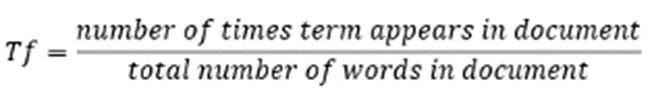

Inverse document frequency measures how rare a term is across all documents (the higher the value, the rarer the word)

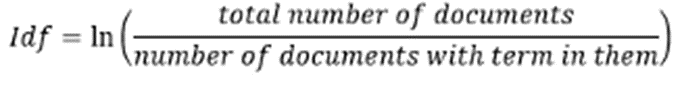

Combining the two to get tf-idf

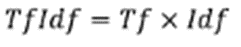

In [ ]:
# using the TfidfTransformer function from sklearn’s library. Fitting occurs on the training set and the values for the same words are determined for the test set.
# import statements
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a bag of words
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000) 
# Fit transform the data 
train_feat = vectorizer.fit_transform(clean_train_reviews).toarray() test_feat = vectorizer.transform(clean_test_reviews).toarray()


# TFIDF train set
tfidf_transformer = TfidfTransformer().fit(train_feat)
train_tfidf = tfidf_transformer.transform(train_feat)
 
# apply tfidf to test set
test_tfidf = tfidf_transformer.transform(test_feat)


# Naive Bayes

This is a probabilistic machine learning model used for classification, based on Bayes Theorem:
B is the evidence while A is the hypothesis 

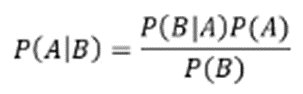

Equation for finding the class:implemented using sklearn’s Naïve Bayes package!

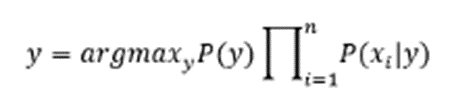

# Random Forest

A random forest is a series of decision trees in which the leaf nodes indicate the predicted class. Each decision tree incorporates a selection of features and outputs a decision at the end. These results are then combined from all the decision trees to give the final class prediction. 

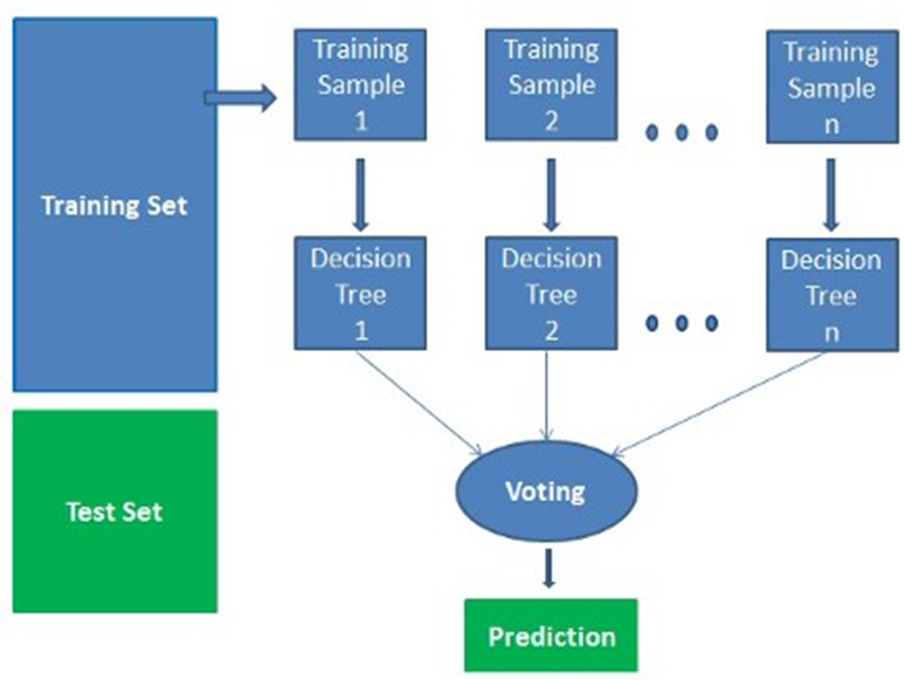

# Evaluation

Kaggle specifies using the area under the ROC curve as the metric for this competition. ROC is short for Receiving Operator Characteristic and is a probability curve. It plots the true positive rate against the false positive rate.[2] The higher the area under this curve, the better the model is at predicting the output. The graph for Bag of words and a Random Forest is below. The dotted line represents the baseline, which would be expected if the predictions were random.

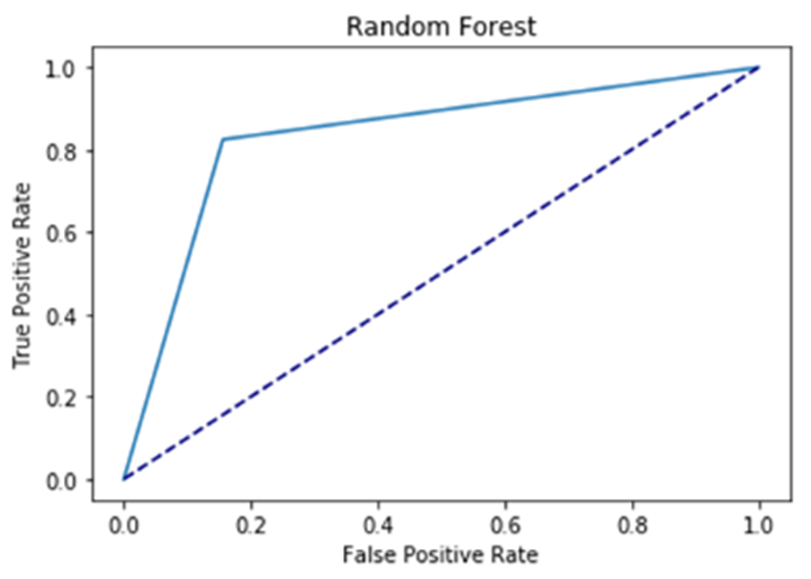

Table of results for various feature and model combination.

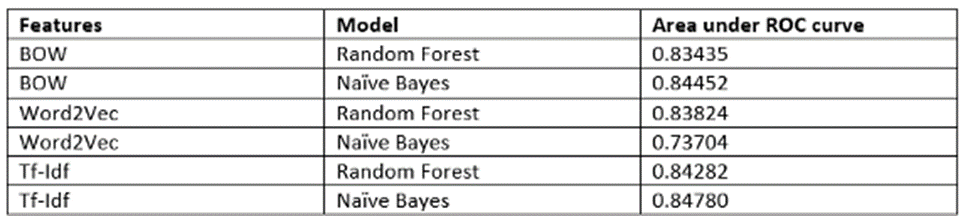